# Emotion Detection - KDEF - K-Fold

Tester: Muhammad Aditya Bayhaqie

[Reference](https://paperswithcode.com/paper/facial-emotion-recognition-using-transfer)

## Library Preparation

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

from keras.datasets import mnist
from keras.utils import to_categorical

from keras import models
from keras import layers

from keras import losses, optimizers, metrics
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
%matplotlib inline

## Import Datasets

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
! mkdir ~/.kaggle

In [6]:
!cp /content/drive/MyDrive/CollabData/kaggle_API/kaggle.json ~/.kaggle/kaggle.json

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download stevemarcelloliem/kdef-raf-fer-complete

Dataset URL: https://www.kaggle.com/datasets/stevemarcelloliem/kdef-raf-fer-complete
License(s): MIT
 99% 642M/649M [00:04<00:00, 239MB/s]
100% 649M/649M [00:04<00:00, 159MB/s]


In [9]:
!unzip kdef-raf-fer-complete.zip

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: Val/happy/Training_88720851.jpg_processed.jpg  
  inflating: Val/happy/Training_88776166.jpg_processed.jpg  
  inflating: Val/happy/Training_88800063.jpg_processed.jpg  
  inflating: Val/happy/Training_88873273.jpg_processed.jpg  
  inflating: Val/happy/Training_88917842.jpg_processed.jpg  
  inflating: Val/happy/Training_88964675.jpg_processed.jpg  
  inflating: Val/happy/Training_89046745.jpg_processed.jpg  
  inflating: Val/happy/Training_89107622.jpg_processed.jpg  
  inflating: Val/happy/Training_89184566.jpg_processed.jpg  
  inflating: Val/happy/Training_8939285.jpg_processed.jpg  
  inflating: Val/happy/Training_89460378.jpg_processed.jpg  
  inflating: Val/happy/Training_89632094.jpg_processed.jpg  
  inflating: Val/happy/Training_89635895.jpg_processed.jpg  
  inflating: Val/happy/Training_89641436.jpg_processed.jpg  
  inflating: Val/happy/Training_89752835.jpg_processed.jpg  
  inflating: Val/happy/Trai

In [17]:
train_dir = '/content/Train'
test_dir ='/content/Val'

## Model 1
Dimension 64

### Data Engineering

In [18]:
dim = 64


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (dim, dim),
    batch_size=32
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (dim, dim),
    batch_size=8
)

Found 35129 images belonging to 7 classes.
Found 8488 images belonging to 7 classes.


### Model Development

#### Arch Build

In [19]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(dim, dim, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,263 (1.34 MB)

 Trainable params: 352,263 (1.34 MB)

 Non-trainable params: 0 (0.00 B)

#### Model Train

In [20]:
model.compile(optimizer=optimizers.Adam(5e-5),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy']
             )

history = model.fit(
    train_generator,
    steps_per_epoch = 146,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=31
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.2672 - loss: 1.8672

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


146/146 ━━━━━━━━━━━━━━━━━━━━ 34s 220ms/step - accuracy: 0.2673 - loss: 1.8671 - val_accuracy: 0.2540 - val_loss: 1.8412
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 217ms/step - accuracy: 0.2844 - loss: 1.8175 - val_accuracy: 0.2661 - val_loss: 1.8008
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 31s 216ms/step - accuracy: 0.2999 - loss: 1.7906 - val_accuracy: 0.3145 - val_loss: 1.7888
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 35s 239ms/step - accuracy: 0.3115 - loss: 1.7675 - val_accuracy: 0.2903 - val_loss: 1.7815
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 40s 277ms/step - accuracy: 0.3249 - loss: 1.7395 - val_accuracy: 0.3589 - val_loss: 1.7171
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 218ms/step - accuracy: 0.3359 - loss: 1.7077 - val_accuracy: 0.4315 - val_loss: 1.6277
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 283ms/step - accuracy: 0.3816 - loss: 1.6495 - val_accuracy: 0.3790 - val_loss: 1.6745
Epoch 8/50
 76/146 ━━━━━━━━━━━━━━━━━━━━ 14s 211ms/step - accuracy: 0.3726 - loss: 1.6499

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 17s 113ms/step - accuracy: 0.3734 - loss: 1.6461 - val_accuracy: 0.3508 - val_loss: 1.7015
Epoch 9/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 270ms/step - accuracy: 0.3980 - loss: 1.6186 - val_accuracy: 0.3508 - val_loss: 1.6728
Epoch 10/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - accuracy: 0.3991 - loss: 1.5789 - val_accuracy: 0.3911 - val_loss: 1.5797
Epoch 11/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 218ms/step - accuracy: 0.3975 - loss: 1.5942 - val_accuracy: 0.3952 - val_loss: 1.6239
Epoch 12/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 217ms/step - accuracy: 0.4015 - loss: 1.5771 - val_accuracy: 0.4476 - val_loss: 1.5219
Epoch 13/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 33s 224ms/step - accuracy: 0.4156 - loss: 1.5488 - val_accuracy: 0.3952 - val_loss: 1.5991
Epoch 14/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 277ms/step - accuracy: 0.4325 - loss: 1.5187 - val_accuracy: 0.4476 - val_loss: 1.4890
Epoch 15/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - accuracy: 0.4556 - loss: 1.4896

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 21s 140ms/step - accuracy: 0.4424 - loss: 1.4829 - val_accuracy: 0.4315 - val_loss: 1.4488
Epoch 17/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 284ms/step - accuracy: 0.4347 - loss: 1.4907 - val_accuracy: 0.4758 - val_loss: 1.4131
Epoch 18/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 220ms/step - accuracy: 0.4259 - loss: 1.4954 - val_accuracy: 0.5121 - val_loss: 1.3863
Epoch 19/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - accuracy: 0.4453 - loss: 1.4840 - val_accuracy: 0.4516 - val_loss: 1.4992
Epoch 20/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 218ms/step - accuracy: 0.4453 - loss: 1.4831 - val_accuracy: 0.4274 - val_loss: 1.5687
Epoch 21/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 218ms/step - accuracy: 0.4437 - loss: 1.4680 - val_accuracy: 0.4516 - val_loss: 1.4669
Epoch 22/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - accuracy: 0.4577 - loss: 1.4717 - val_accuracy: 0.3790 - val_loss: 1.5887
Epoch 23/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 218ms/step - accuracy: 0.4561 - loss: 1.444

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 17s 114ms/step - accuracy: 0.4613 - loss: 1.4281 - val_accuracy: 0.4073 - val_loss: 1.4820
Epoch 25/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 87s 222ms/step - accuracy: 0.4733 - loss: 1.4176 - val_accuracy: 0.5242 - val_loss: 1.3727
Epoch 26/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 284ms/step - accuracy: 0.4943 - loss: 1.3993 - val_accuracy: 0.4677 - val_loss: 1.3832
Epoch 27/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 278ms/step - accuracy: 0.4590 - loss: 1.4375 - val_accuracy: 0.5161 - val_loss: 1.4001
Epoch 28/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 34s 230ms/step - accuracy: 0.4701 - loss: 1.4041 - val_accuracy: 0.4839 - val_loss: 1.4344
Epoch 29/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 218ms/step - accuracy: 0.4766 - loss: 1.3861 - val_accuracy: 0.4274 - val_loss: 1.4896
Epoch 30/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - accuracy: 0.4788 - loss: 1.4032 - val_accuracy: 0.4758 - val_loss: 1.4246
Epoch 31/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 284ms/step - accuracy: 0.5008 - loss: 1.363

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 17s 114ms/step - accuracy: 0.4534 - loss: 1.4245 - val_accuracy: 0.4315 - val_loss: 1.3890
Epoch 33/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - accuracy: 0.4784 - loss: 1.4068 - val_accuracy: 0.4758 - val_loss: 1.3679
Epoch 34/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 284ms/step - accuracy: 0.4804 - loss: 1.4086 - val_accuracy: 0.4234 - val_loss: 1.4587
Epoch 35/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 282ms/step - accuracy: 0.4789 - loss: 1.3659 - val_accuracy: 0.4556 - val_loss: 1.3892
Epoch 36/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 40s 276ms/step - accuracy: 0.5178 - loss: 1.3217 - val_accuracy: 0.5444 - val_loss: 1.3159
Epoch 37/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - accuracy: 0.5035 - loss: 1.3359 - val_accuracy: 0.4718 - val_loss: 1.4240
Epoch 38/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - accuracy: 0.5139 - loss: 1.3262 - val_accuracy: 0.4476 - val_loss: 1.3883
Epoch 39/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - accuracy: 0.5124 - loss: 1.327

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 17s 114ms/step - accuracy: 0.4965 - loss: 1.3566 - val_accuracy: 0.5242 - val_loss: 1.3220
Epoch 41/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 82s 436ms/step - accuracy: 0.4946 - loss: 1.3523 - val_accuracy: 0.4597 - val_loss: 1.3692
Epoch 42/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 218ms/step - accuracy: 0.4963 - loss: 1.3522 - val_accuracy: 0.5444 - val_loss: 1.3006
Epoch 43/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 222ms/step - accuracy: 0.5103 - loss: 1.3248 - val_accuracy: 0.5121 - val_loss: 1.3648
Epoch 44/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 33s 227ms/step - accuracy: 0.5127 - loss: 1.3053 - val_accuracy: 0.5121 - val_loss: 1.3939
Epoch 45/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 284ms/step - accuracy: 0.5039 - loss: 1.3259 - val_accuracy: 0.5202 - val_loss: 1.3235
Epoch 46/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 277ms/step - accuracy: 0.5120 - loss: 1.2971 - val_accuracy: 0.4798 - val_loss: 1.4538
Epoch 47/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - accuracy: 0.5032 - loss: 1.306

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 20s 140ms/step - accuracy: 0.5142 - loss: 1.3043 - val_accuracy: 0.4718 - val_loss: 1.3630
Epoch 49/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 52s 233ms/step - accuracy: 0.5202 - loss: 1.2723 - val_accuracy: 0.4758 - val_loss: 1.4245
Epoch 50/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 279ms/step - accuracy: 0.5113 - loss: 1.3059 - val_accuracy: 0.5444 - val_loss: 1.2664


#### Model Evaluation

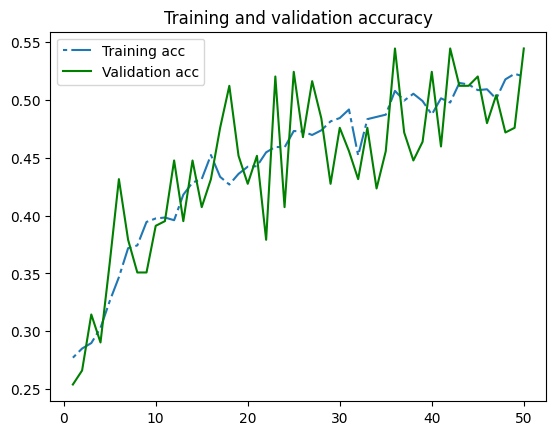

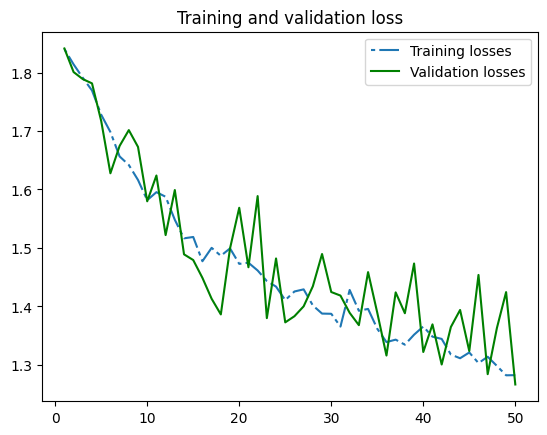

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,  dashes=[2, 2, 10, 2], label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss,  dashes=[2, 2, 10, 2], label='Training losses')
plt.plot(epochs, val_loss, 'g', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Model 2
Dimension 350

### Data Engineering

In [ ]:
dim = 350


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (dim, dim),
    batch_size=32
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (dim, dim),
    batch_size=8
)

### Model Development

#### Arch Build

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(dim, dim, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.summary()

#### Model Train

In [ ]:
model.compile(optimizer=optimizers.Adam(5e-5),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy']
             )

history = model.fit(
    train_generator,
    steps_per_epoch = 146,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=31
)

#### Model Evaluation

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,  dashes=[2, 2, 10, 2], label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss,  dashes=[2, 2, 10, 2], label='Training losses')
plt.plot(epochs, val_loss, 'g', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Model 3
Dimension 48

### Data Engineering

In [ ]:
dim = 48


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (dim, dim),
    batch_size=32
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (dim, dim),
    batch_size=8
)

### Model Development

#### Arch Build

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(dim, dim, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.summary()

#### Model Train

In [ ]:
model.compile(optimizer=optimizers.Adam(5e-5),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy']
             )

history = model.fit(
    train_generator,
    steps_per_epoch = 146,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=31
)

#### Model Evaluation

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,  dashes=[2, 2, 10, 2], label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss,  dashes=[2, 2, 10, 2], label='Training losses')
plt.plot(epochs, val_loss, 'g', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Model 4
Dimension 224

### Data Engineering

In [ ]:
dim = 224


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (dim, dim),
    batch_size=32
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (dim, dim),
    batch_size=8
)

### Model Development

#### Arch Build

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(dim, dim, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.summary()

#### Model Train

In [ ]:
model.compile(optimizer=optimizers.Adam(5e-5),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy']
             )

history = model.fit(
    train_generator,
    steps_per_epoch = 146,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=31
)

#### Model Evaluation

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,  dashes=[2, 2, 10, 2], label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss,  dashes=[2, 2, 10, 2], label='Training losses')
plt.plot(epochs, val_loss, 'g', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Model 5
Dimension 128

### Data Engineering

In [ ]:
dim = 128


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (dim, dim),
    batch_size=32
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (dim, dim),
    batch_size=8
)

### Model Development

#### Arch Build

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(dim, dim, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.summary()

#### Model Train

In [ ]:
model.compile(optimizer=optimizers.Adam(5e-5),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy']
             )

history = model.fit(
    train_generator,
    steps_per_epoch = 146,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=31
)

#### Model Evaluation

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,  dashes=[2, 2, 10, 2], label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss,  dashes=[2, 2, 10, 2], label='Training losses')
plt.plot(epochs, val_loss, 'g', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()